In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [19]:
# Load dataframe
df = pd.read_csv("datasets/twitch-data-cleaned.csv")

In [20]:
# Drop unnecessary columns and categorical columns
df = df[['watch_time_minutes', 'stream_time_minutes', 'peak_viewers', 'average_viewers', 'followers', 'followers_gained', 'views_gained']]

In [21]:
# Set target and features
X = df.drop(columns=["watch_time_minutes"])
y = df["watch_time_minutes"]

In [22]:
# Log-transform the target to deal with skew
y_log = np.log1p(y)

In [23]:
# Train-test split
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_log)

RandomForestRegressor(random_state=42)

In [24]:
# Predict on test set
y_pred_log = rf.predict(X_test)

In [25]:
# Inverse log transform predictions and ground truth
y_test = np.expm1(y_test_log)
y_pred = np.expm1(y_pred_log)

In [26]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.0f} minutes")
print(f"R² Score: {r2:.3f}")

RMSE: 102,083,745 minutes
R² Score: 0.925


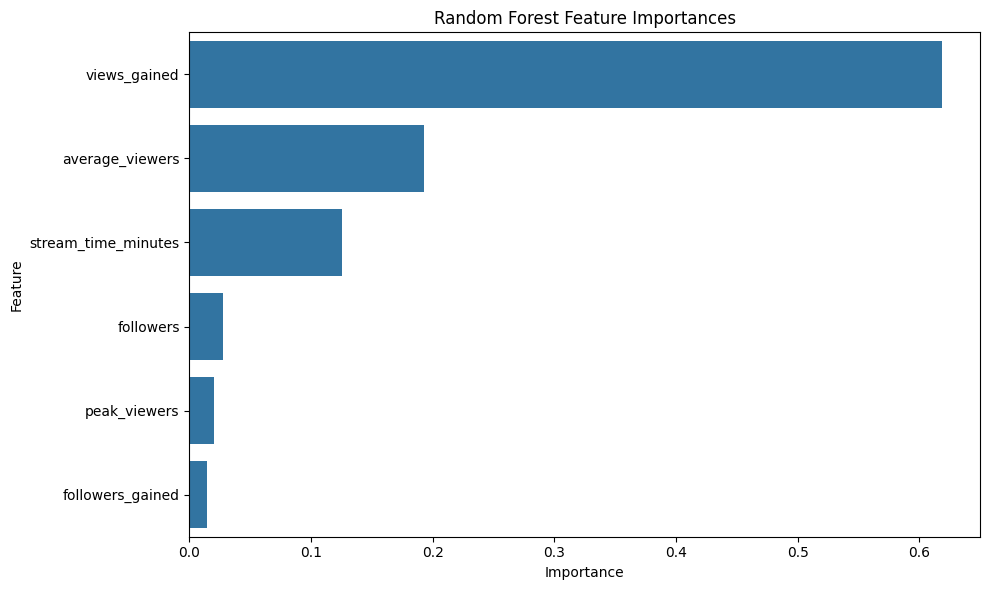

In [27]:
# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

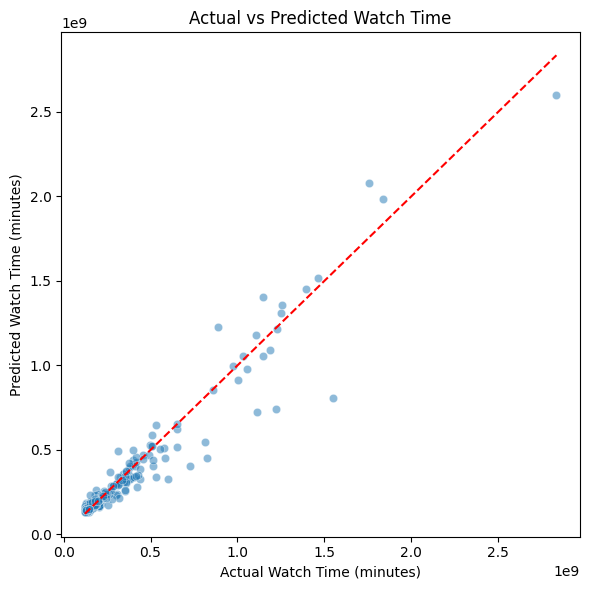

In [28]:
# Plot predicted vs. actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Watch Time (minutes)")
plt.ylabel("Predicted Watch Time (minutes)")
plt.title("Actual vs Predicted Watch Time")
plt.tight_layout()
plt.show()